# 🏥 Brest Cancer Classification using *Support Vector Machines* & *Principal Component Analysis* ⚕️
---

## 1. Overview
<p style="text-align: justify;">   
.   For this project, it will be used the 'Breast Cancer Wisconsin (Diagnostic) Database', as source for the ML model for predicting if a cancer is either <strong>Benign</strong> or <strong>Malignant</strong>, based on many features further described.
</p>

In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [6]:
#Load the data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

<h5> Here it has some information describing the data: </h5>
<br>

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 1.1 Principal Component Analysis (PCA)
According to [wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis), PCA can be defined as: 
> PCA is a statistical technique for **reducing the dimensionality of a dataset**. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data .

<figure>
    <center><img src="https://i.stack.imgur.com/O740D.png", height="250" width="500"></center>
</figure>

<center> Image source: i.stack.imgur.com </center>

### 1.2 Support Vector Machines

According to [wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis), SVM can be defined as: 

> Support Vector Machines are supervised learning models with associated learning algorithms. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. 

>SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.
<figure>
    <center><img src = "https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png", height="125" width="250"></center>
</figure>

 _ img source: wikipedia _

## 2. Preprocessing
---

* Starting the project tacking a look into the Data. The predicted variable array is stored on `cancer['target']`, and the features are stored at `cancer['data']`. 

* Let's take a look into the df head, to check which kind of data we are working with:

In [7]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* To better our ML model, before decomposing it, we need to scale the columns into a standard scaler. It will help the model to better understand the influence of data points, when applying linear transformations:

In [12]:
#Scale the components
from sklearn.preprocessing import StandardScaler

#create the scaler:
scaler = StandardScaler()
scaler.fit(df)

#transform the Features
df_scaled = scaler.transform(df)

### 3. Machine Learning Model
---

### Part 1: Decomposing the model

* Now, first thing to do is to reduce the features into two components of their linear transformations (So that we can plot the data and see how it is classified)

In [14]:
from sklearn.decomposition import PCA

In [17]:
#fit transform features to decompose them into 2 components:
pca = PCA(n_components = 2)
pca.fit(df_scaled)
x_pca = pd.DataFrame(pca.transform(df_scaled), columns = ['Component_1', 'Component_2'])

In [23]:
#Check the new DF scaled!!
x_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Component_1  569 non-null    float64
 1   Component_2  569 non-null    float64
dtypes: float64(2)
memory usage: 9.0 KB


* Bellow you can see the weights of each feature for the projections in each component. For that, the PCA model stores them in the `.components_` method

In [26]:
composit = pd.DataFrame(pca.components_, columns = df.columns, index = ['Component_1', 'Component_2'])
composit.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Component_1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
Component_2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


* Finally, let's plot the data using the `x_pca` DF and the labels stored for each row in the `cancer['target']`

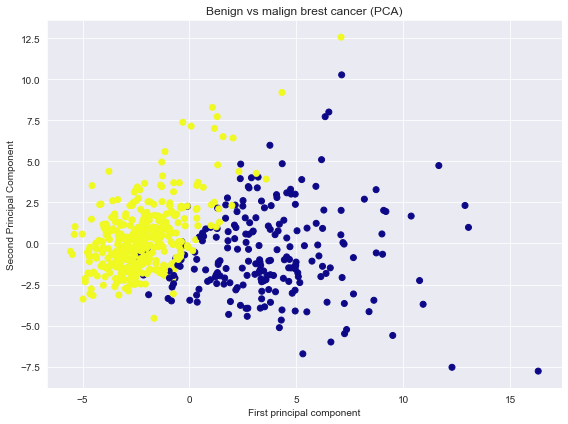

In [31]:
#Plot the data to from its components:

plt.figure(figsize=(8,6))
plt.scatter(x_pca['Component_1'],x_pca['Component_2'],c = cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Benign vs malign brest cancer (PCA)')
sns.set_style('darkgrid')
plt.tight_layout()

### Part 2: Apply SVM Classifier

* Next step will be split the data into train/test. It will be used 80% ofit to train;
* Then, to find the best classification line, it will be used the scikit-learn `SVC()` method;
    * OBS: To select the right 'C' and 'gamma' parameters, we will use a GridSearch method to test a small range of parameters. Because the test data is a bit small, it will be applied a Cross Validation on each combination of parameters;   

In [33]:
from sklearn.model_selection import train_test_split

#to ease understanding:
X = x_pca
y = cancer['target']

#split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=101)

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()

#creating a dist of params to test
param_grid = {'C':[0.1, 1,10,100,1000],
              'gamma': [1,0.1,0.01, 0.001,0.0001]}

S_grid = GridSearchCV(model, param_grid, verbose = 3, refit=True)

S_grid.fit(X_train, y_train) #fit the grid_search

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

[CV 2/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 3/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 4/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 5/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 1/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [40]:
#The best model was:
S_grid.best_estimator_

SVC(C=100, gamma=0.01)

Last, we have to evaluate the model. For that, two methods will be used:
 - Confusion Matrix;
 - Classification Report;

In [35]:
#grab the best model and make predictions
predictions = S_grid.predict(X_valid)

In [36]:
#Evaluate:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_valid,predictions))

[[40  2]
 [ 3 69]]


In [37]:
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Diagnosis

1. Confusion Matrix: 
    - Out of 114 samples of brest cancer in the test data, the model predicted 109 correctly and 5 incorrectly (0.96 accuracy). The most important is to reduce False Negative predictions (i.e, predicting the cancer is BENIGN, when it is MALIGNANT), as the risk is much greater of resulting in complications to the pacient. In test, out of 5 misevaluations, 3 were False Negatives, and two were False Positives;

2. Classification Report:
    - Looking at the Classification Report, if we assess the model by Rightfully classifying a Malignant Cancer, we can only aprove the model if we accept a minimum Recall of 96%. On the other hand, if we consider the misdiagnosis equaly important, we can only aprove the model if we accept a f1-score of above 97%. 